# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
## Keras Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [ ]:
df = pd.read_csv('/content/compresive_strength_concrete.csv')

# Display Data

In [ ]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Check Null Values (No Null Values in the dataset)

In [ ]:
df.isnull().sum()  

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

## 3) Split Dataset

In [ ]:
X=df.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)
y=df['Concrete compressive strength(MPa, megapascals) ']

## Normalization

In [ ]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

##  50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

 X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1) 

## Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

In [ ]:
clf = Sequential()
clf.add(Dense(10, activation='relu', input_dim=8))
clf.add(Dropout(0.5)) # Dropout Layer
clf.add(Dense(8, activation='relu'))
clf.add(Dropout(0.5)) # Dropout Layer
clf.add(Dense(6, activation='relu'))
clf.add(Dense(1))

## COmpile Model

In [ ]:
clf.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # Compiling Model

In [ ]:
history = clf.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
13/13 [==============================] - 1s 35ms/step - loss: 1652.8583 - mae: 36.8183 - val_loss: 1409.6688 - val_mae: 34.1930
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 1563.8670 - mae: 35.9863 - val_loss: 1398.8544 - val_mae: 34.0386
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 1572.8525 - mae: 35.9828 - val_loss: 1387.4154 - val_mae: 33.8750
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 1605.0153 - mae: 36.4095 - val_loss: 1375.1677 - val_mae: 33.6987
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 1512.5051 - mae: 35.2473 - val_loss: 1362.1052 - val_mae: 33.5106
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 1457.4810 - mae: 33.9915 - val_loss: 1348.4073 - val_mae: 33.3116
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 1473.6978 - mae: 34.4624 - val_loss: 1332.7657 - val_mae: 33.0833
Epoch 8/100
13/13 [=======

## Prediction

In [ ]:
pred = clf.predict(X_test)

## Evaluation

In [ ]:
mse_score, mae_score = clf.evaluate(X_test, y_test)

17/17 [==============================] - 0s 1ms/step - loss: 229.4629 - mae: 11.8483


In [ ]:
# MSE Score
mse_score

229.462890625

In [ ]:
# MAE Score
mae_score

11.848328590393066

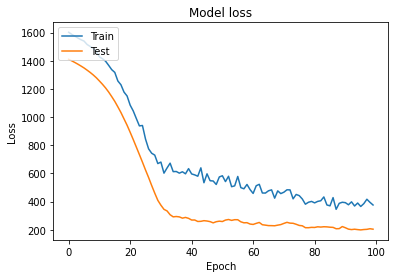

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()